##  Project Name: Analysis of Weather Patterns to Predict Hurricanes
### Name: Nicolas Bolanos
### Date: October 2023

##### Purpose: 

- To predict weather patterns and track hurricanes to predict landfall and advise federal, local and state government authorities to keep citizens informed. 

- To compare past hurricanes to understand how climate change has increased development of hurricanes.

#### 1.  Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import copy
warnings.simplefilter("ignore")
plt.style.use("bmh")

import dateutil.parser as parser
import datetime as dt

#### 2. Access Dataset atlantic.csv

In [2]:
# Import OS to check files
import os
os.getcwd()

'/Users/nico/Developer/DataScience/Last_Term_DS/DSC-680/Project_2_Milestone'

In [3]:
ls

Bolanos_Nicolas_Milestone_1 2.pdf  Libraries Test.ipynb
Bolanos_Nicolas_Milestone_1.docx   atlantic.csv
Bolanos_Nicolas_Milestone_1.pdf    atlantic.csv.zip
Bolanos_Nicolas_Project_2.ipynb


In [4]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

In [5]:
storms_df = pd.read_csv("atlantic.csv")

In [6]:
storms_df.tail(15)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
49090,AL122015,KATE,20151110,0,,TS,26.4N,76.2W,50,1006,70,50,0,20,20,0,0,0,0,0,0,0
49091,AL122015,KATE,20151110,600,,TS,28.0N,76.2W,55,1003,70,50,20,20,20,0,0,0,0,0,0,0
49092,AL122015,KATE,20151110,1200,,TS,29.5N,75.4W,60,998,70,70,20,20,20,10,0,0,0,0,0,0
49093,AL122015,KATE,20151110,1800,,TS,31.2N,74.0W,60,993,70,70,20,20,20,10,0,0,0,0,0,0
49094,AL122015,KATE,20151111,0,,HU,33.1N,71.3W,65,990,80,80,60,20,20,30,0,0,0,20,0,0
49095,AL122015,KATE,20151111,600,,HU,35.2N,67.6W,70,985,80,100,100,20,30,60,0,0,0,20,0,0
49096,AL122015,KATE,20151111,1200,,HU,36.2N,62.5W,75,980,120,180,180,50,60,90,60,0,0,30,0,0
49097,AL122015,KATE,20151111,1800,,HU,37.6N,58.2W,65,980,150,200,180,60,60,90,60,0,0,40,0,0
49098,AL122015,KATE,20151112,0,,EX,38.9N,55.0W,65,980,180,210,180,90,90,110,60,0,0,40,0,0
49099,AL122015,KATE,20151112,600,,EX,40.0N,52.0W,65,980,220,220,180,120,120,120,60,0,0,40,0,0


In [7]:
# Formatting Time zone for analysis
# Replacing old for new to get accurate details

storms_df["Time"] = storms_df["Time"].astype("object")
time_replace = [str(x) for x in storms_df["Time"].unique()]
for i, txt in enumerate (time_replace):
    time_replace[i] = txt.rjust(4, "0")
    time_replace[i] = f"{time_replace[i][0:2]}:{time_replace[i][2:4]}:00"
        
for old, new in zip(storms_df["Time"].unique(), time_replace):
    storms_df.loc[storms_df["Time"]==old, "Time"] = new

In [8]:
storms_df["Date"] = storms_df["Date"].astype("object")
for i, date_str in enumerate (storms_df["Date"].unique()):
    storms_df.loc[storms_df["Date"]==date_str, "Date"] = f"{str(date_str)[0:4]}-{str(date_str)[4:6]}-{str(date_str)[6:]}"

In [9]:
# Declaring new variable to calculate new values




storms_df["Datetime"] = storms_df["Date"]+" "+storms_df["Time"]

storms_df["Datetime"] = pd.to_datetime(storms_df["Datetime"])

storms_df.drop(columns=["Date", "Time"], inplace=True)

storms_df.sort_values(by=["Datetime"], inplace=True)

In [10]:
storms_df["Name"] = storms_df["Name"].str.strip()
storms_df["Status"] = storms_df["Status"].str.strip()
storms_df["Event"] = storms_df["Event"].str.strip()

In [11]:
storms_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49105 entries, 0 to 49104
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                49105 non-null  object        
 1   Name              49105 non-null  object        
 2   Event             49105 non-null  object        
 3   Status            49105 non-null  object        
 4   Latitude          49105 non-null  object        
 5   Longitude         49105 non-null  object        
 6   Maximum Wind      49105 non-null  int64         
 7   Minimum Pressure  49105 non-null  int64         
 8   Low Wind NE       49105 non-null  int64         
 9   Low Wind SE       49105 non-null  int64         
 10  Low Wind SW       49105 non-null  int64         
 11  Low Wind NW       49105 non-null  int64         
 12  Moderate Wind NE  49105 non-null  int64         
 13  Moderate Wind SE  49105 non-null  int64         
 14  Moderate Wind SW  4910

In [12]:
print(f"Dataset stores data of approximately {storms_df['ID'].unique().shape[0]} Hurricanes from {storms_df['Datetime'].dt.year.min()} to {storms_df['Datetime'].dt.year.max()}.")

Dataset stores data of approximately 1814 Hurricanes from 1851 to 2015.


#### 2. Analyzing Hurricane Data with Visualizations 

In [13]:
# Declaring function to understand coordinates

def coordinate_mapping(x):
    coord = float(x[:-1])
    if x[-1]=="W":
        coord *= -1
    if x[-1]=="S":
        coord *= -1
    return coord
    

In [14]:
storms_df["Latitude"] = storms_df["Latitude"].apply(coordinate_mapping)
storms_df["Longitude"] = storms_df["Longitude"].apply(coordinate_mapping)

In [15]:
# Display Longitude and Latitude Coordinates to locate datapoints

print("Min. Long.:",storms_df.Longitude.min(), "Max. Long.:", storms_df.Longitude.max(), "Min. Lat.:", storms_df.Latitude.min(), "Max. Lat.:",storms_df.Latitude.max())

Min. Long.: -359.1 Max. Long.: 63.0 Min. Lat.: 7.2 Max. Lat.: 81.0


- The coordinate values above require to be rescaled to from 180 degrees to -180 degrees in rotation

In [16]:
storms_df.loc[storms_df.Longitude<-180, "Longitude"] = storms_df.Longitude + 360

In [17]:
geo_df = gpd.GeoDataFrame(storms_df,geometry=gpd.points_from_xy(storms_df.Longitude, storms_df.Latitude), crs={'init' : 'epsg:4326'})

In [18]:
# Displaying Geo data from dataset
geo_df.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# Accessing data from world gpd.datasets 

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

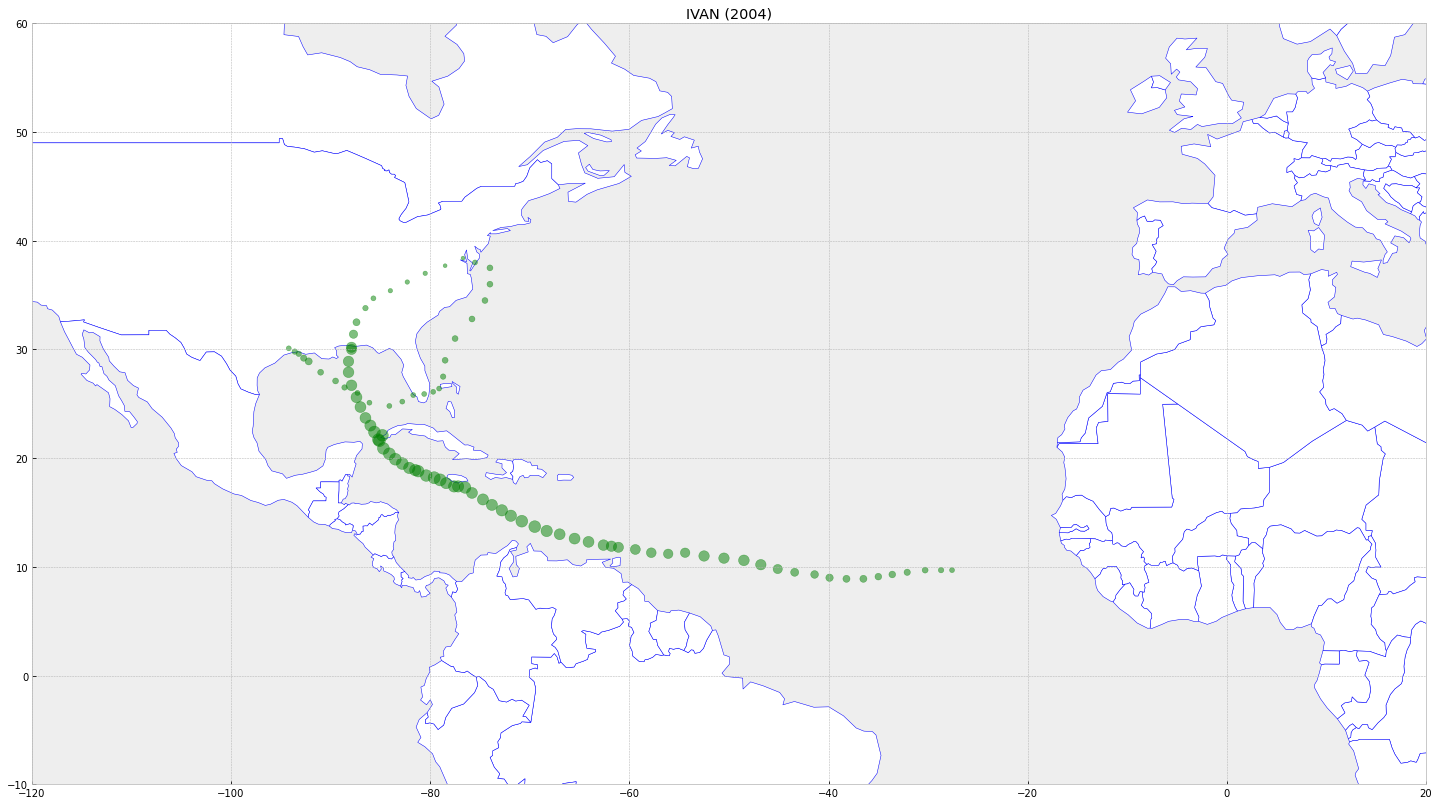

In [20]:
ax = world.plot(color="white", edgecolor = "blue", figsize=(27,14))
_ = geo_df[geo_df["ID"]=="AL092004"].plot(ax=ax, c="green", markersize="Maximum Wind", alpha=0.5)

_ = plt.xlim(-120, 20)

_ = plt.ylim(-10, 60)

_ = plt.title(f"{geo_df[geo_df['ID']=='AL092004'].Name.unique()[0]} ({geo_df[geo_df['ID']=='AL092004'].Datetime.dt.year.unique()[0]})")

#### Plot Explanation: 

- The plot above displays the trayectory of hurricane season ID AL092004 which belongs to September 2004 variable.

- Storms developed on the West Coast of Africa and their strength did not increase due to low water temperature. 

- Each data point shows an increase of storms at Latitude between -40 to 20 and Longitude 0 to 10 degrees. 

- Each storm system gained much strength after passing through the Caribbean Ocean Between Venezuela and Puerto Rico due to high warm temperature in the ocean. 

In [21]:
# Assigning x-axis and y-axis values 0 and 1 to figure out which storm belongs to what location on the grid.  

lat_min = geo_df.Latitude.min()

long_min = geo_df.Longitude.min()

geo_df["x"] = geo_df.Latitude-lat_min

geo_df["x"] = geo_df["x"]/geo_df["x"].max()

geo_df["y"] = geo_df.Longitude-long_min

geo_df["y"] = geo_df["y"]/[geo_df["y"].max()]

- Feature to understand data which corresponds to January water temperature equal to 0 and December equal to 1.

- Each feature will be assigned a Month of Year and Hour of Day.

In [22]:
# Generate features:

# 1/366 = Days in year

# 1/24 = Hours in a Day

# 1/60 = Minutes in an Hour
geo_df["relative_time"] = ((geo_df.Datetime.dt.dayofyear+(geo_df.Datetime.dt.hour/24.)+(geo_df.Datetime.dt.minute/60. *24))/366.)

In [23]:
geo_df["month"] = geo_df.Datetime.dt.month

geo_df["hour"] = geo_df.Datetime.dt.hour

#### Understanding Hurricane Seasons-Diagram

- Plot describes increase vs. decrease of wind measurments or speeds during Hurricane season

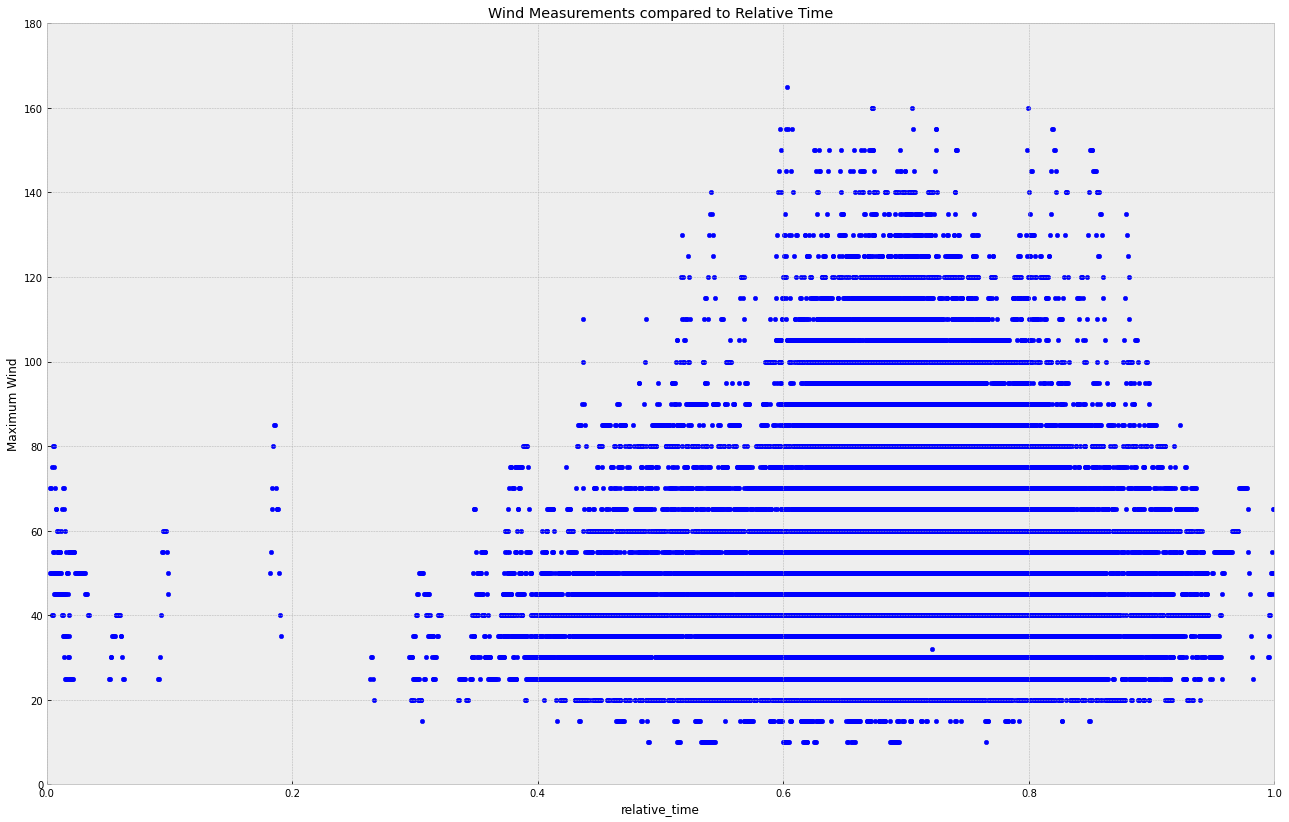

In [24]:
_ = geo_df.plot(x="relative_time", y="Maximum Wind", kind="scatter", figsize=(22,14), title="Wind Measurements compared to Relative Time")

_ = plt.ylim(0,180)

_ = plt.xlim(0, 1)

#### Next Steps: Predicting Storm Trajectory. 

- An important process to accomplish this step is to calculate the vectors for each positional change.

In [25]:
geo_df["vectr_x"]=np.nan

geo_df["vectr_y"]=np.nan

vectr_s = {"x": [], "y": [], "id":[]}

for storm_id in geo_df ["ID"].unique():
    last_x = 0
    last_y = 0
    for i, row in geo_df[geo_df["ID"]==storm_id].iterrows():
        if last_x==0:
            last_x = row.x
            last_y = row.y
        else: 
                    vectr_x = row.x-last_x
                    vectr_y = row.y-last_y
                    vectr_s["x"].append(vectr_x)
                    vectr_s["y"].append(vectr_y)
                    vectr_s["id"].append(i)
                    last_x = row.x
                    last_y = row.y
geo_df.loc[vectr_s["id"], "vectr_x"] = vectr_s["x"]

geo_df.loc[vectr_s["id"], "vectr_y"] = vectr_s["y"]
          
                    
                

- Model to predict change in direction in which the angle is used for this calculation and the change in distance-length

In [26]:
# Setting up vector length variable to calculate storm movements
geo_df['vect_len'] = np.sqrt((geo_df["vectr_x"]**2)+(geo_df["vectr_y"]**2))

In [27]:
# Function to calculate direction

def calculate_storm_direction(vectr_x, vectr_y):
    def vect_angle(a, b):
        return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
    ref_vectr = np.array([vectr_x, vectr_y])
    N_vectr = np.array([0,1])
    S_vectr = np.array([0,-1])
    E_vectr = np.array([1, 0])
    W_vectr = np.array([-1,0])
    N_angle = vect_angle(ref_vectr, N_vectr)
    E_angle = vect_angle(ref_vectr, E_vectr)
    W_angle = vect_angle(ref_vectr, W_vectr)
    return_angle = N_angle
    if W_angle<E_angle:
        return_angle = 2*np.pi-return_angle
    return return_angle

In [28]:
geo_df["vectr_direction"]= geo_df.apply(lambda x:calculate_storm_direction(x.vectr_x, x.vectr_y), axis=1)

In [29]:
geo_df["tdelta"] = np.nan
tdeltas = {"t":[], "id":[]}
for storm_id in geo_df["ID"].unique():
    last_time = 0
    for i, row in geo_df[geo_df["ID"]==storm_id].iterrows():
        if last_time==0:
            last_time = row.Datetime
        else: 
            tdeltas["t"].append((row.Datetime-last_time).seconds)
            tdeltas["id"].append(i)
            last_time = row.Datetime
geo_df.loc[tdeltas["id"], "tdelta"] = tdeltas["t"]

In [30]:
geo_df = geo_df[geo_df["tdelta"]==21600]
geo_df.shape

(45717, 32)

In [31]:
# Calculating Previous Length and Direction

geo_df["prev_len"] = np.nan
geo_df["prev_direction"] = np.nan
prevs = {"len": [],"direction": [], "id": []}
for storm_id in geo_df["ID"].unique():
    last_len = False
    last_direction = False
    for i, row in geo_df[geo_df["ID"]==storm_id].iterrows():
        if last_len==False:
            last_len = row.vect_len
            last_direction = row.vectr_direction
        else: 
            prevs["len"].append(last_len)
            prevs["direction"].append(last_direction)
            prevs["id"].append(i)
            last_len = row.vect_len
            last_direction = row.vectr_direction
            
geo_df.loc[prevs["id"], "prev_len"] = prevs["len"]
geo_df.loc[prevs["id"], "prev_direction"] = prevs["direction"]

In [32]:
geo_df.dropna(how="any", inplace=True)
geo_df.shape

(43765, 34)

In [33]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 43765 entries, 2 to 49104
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                43765 non-null  object        
 1   Name              43765 non-null  object        
 2   Event             43765 non-null  object        
 3   Status            43765 non-null  object        
 4   Latitude          43765 non-null  float64       
 5   Longitude         43765 non-null  float64       
 6   Maximum Wind      43765 non-null  int64         
 7   Minimum Pressure  43765 non-null  int64         
 8   Low Wind NE       43765 non-null  int64         
 9   Low Wind SE       43765 non-null  int64         
 10  Low Wind SW       43765 non-null  int64         
 11  Low Wind NW       43765 non-null  int64         
 12  Moderate Wind NE  43765 non-null  int64         
 13  Moderate Wind SE  43765 non-null  int64         
 14  Moderate Wind 

#### Prediction and Model Process

- Next step is to predict the direction and distance for each time-step.

- Model includes distance-traveled and direction but it depends on the following features:

1. Max Wind: Measures highest measurement of wind-velocity

2. Position of x and y values to understand how each storm behaves in the gulf of Mexico.

3. According to data, the month of the year will display climatic conditions such as Jet-stream and Temperature. 

4. Temperature rises depending on the hour of the day. Morning temperatures vs. Afternoon, or Evening temperatures. 

5. Gradient Boosting regressor used to increase model's accuracy score

In [34]:
geo_df_prediction_direction = geo_df[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vectr_direction"]]
geo_df_prediction_length = geo_df[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction","vect_len"]]
X_direction = geo_df_prediction_direction.values[:,:-1]
y_direction = geo_df_prediction_direction.values[:,-1]
X_length = geo_df_prediction_length.values[:,:-1]
y_length = geo_df_prediction_length.values[:,-1]

In [35]:
from sklearn.model_selection import train_test_split

X_direction_train, X_direction_test, y_direction_train, y_direction_test = train_test_split(X_direction, y_direction, test_size=0.2, random_state=42)

X_length_train, X_length_test, y_length_train, y_length_test = train_test_split(X_length, y_length, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [37]:
model_direction = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0, loss='squared_error').fit(X_direction_train, y_direction_train)
mean_squared_error(y_direction_test, model_direction.predict(X_direction_test))

0.4078027050016757

In [38]:
# Applying 'huber' to see a combination of both squared and absolute error of regression. 
model_length = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=5, random_state=0, loss='huber').fit(X_length_train, y_length_train)

mean_squared_error(y_length_test, model_length.predict(X_length_test))

1.0391701030791645e-05

In [39]:
# Applying squared_error to see squared error for regression
model_length = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=5, random_state=0, loss='squared_error').fit(X_length_train, y_length_train)

mean_squared_error(y_length_test, model_length.predict(X_length_test))

1.1899255435051726e-05

In [95]:
# Applying absolute_error to see absolute error for regression
model_length = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=5, random_state=0, loss='absolute_error').fit(X_length_train, y_length_train)

mean_squared_error(y_length_test, model_length.predict(X_length_test))

1.0560873478775013e-05

Test Results from Gradient Boosting error show that the mean squared error is low at 22.9 degrees. Therefore, the error between the length/distance is minor or very low. The absolute error of regression shows a lower value which proofs that both calculations have a lower probability in displaying errors.

SHAP (SHapley Additive exPlanations): is a game theoretic approach to explain the output of any machine learning model.
It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.
The shap module is used to look at the feature of importances to understand wind direction based on location and season of the year.

In [44]:
# Import shap module

import shap

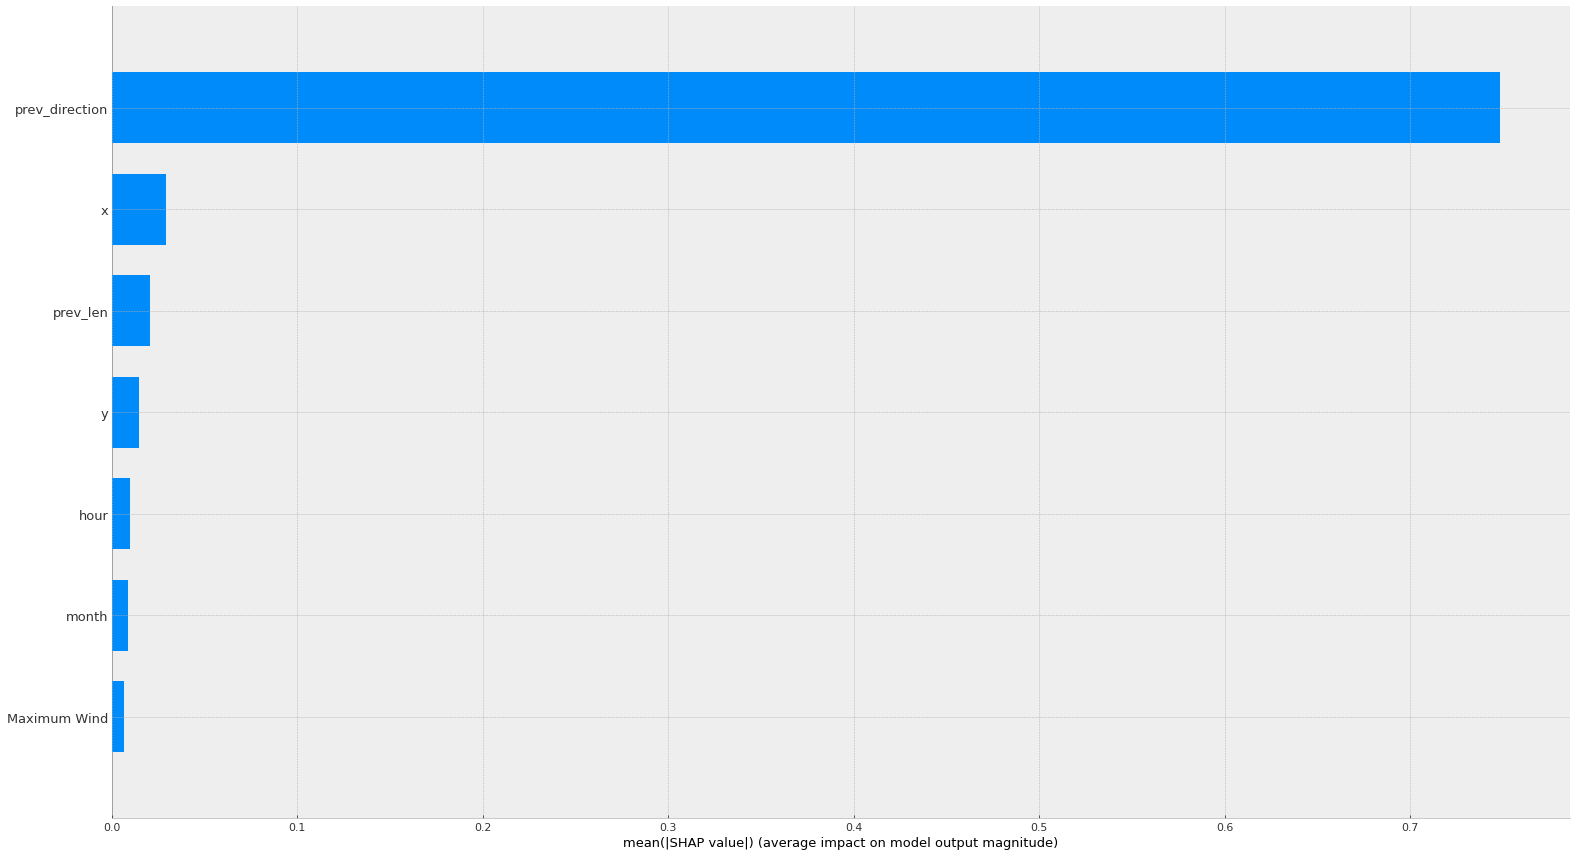

In [46]:
explainer_direction = shap.TreeExplainer(model_direction)
shap_values_direction = explainer_direction.shap_values(X_direction_test)
shap.summary_plot(shap_values_direction, X_direction_test, plot_type = "bar", feature_names=["Maximum Wind", "x", "y", "month", "hour", "prev_len","prev_direction"], title="Model of Direction and Features", plot_size=(22,12))

The Graphic above provides good insight on the "previous-direction" variable which demonstrates how much previous storms's direction affected patterns and "touch-down" locations. Other varibles such as latitude and previous distance display minor results compared to the others.  

The following bar chart predicts values in distance/length and targets the previous value as the main point of interest in the study. 

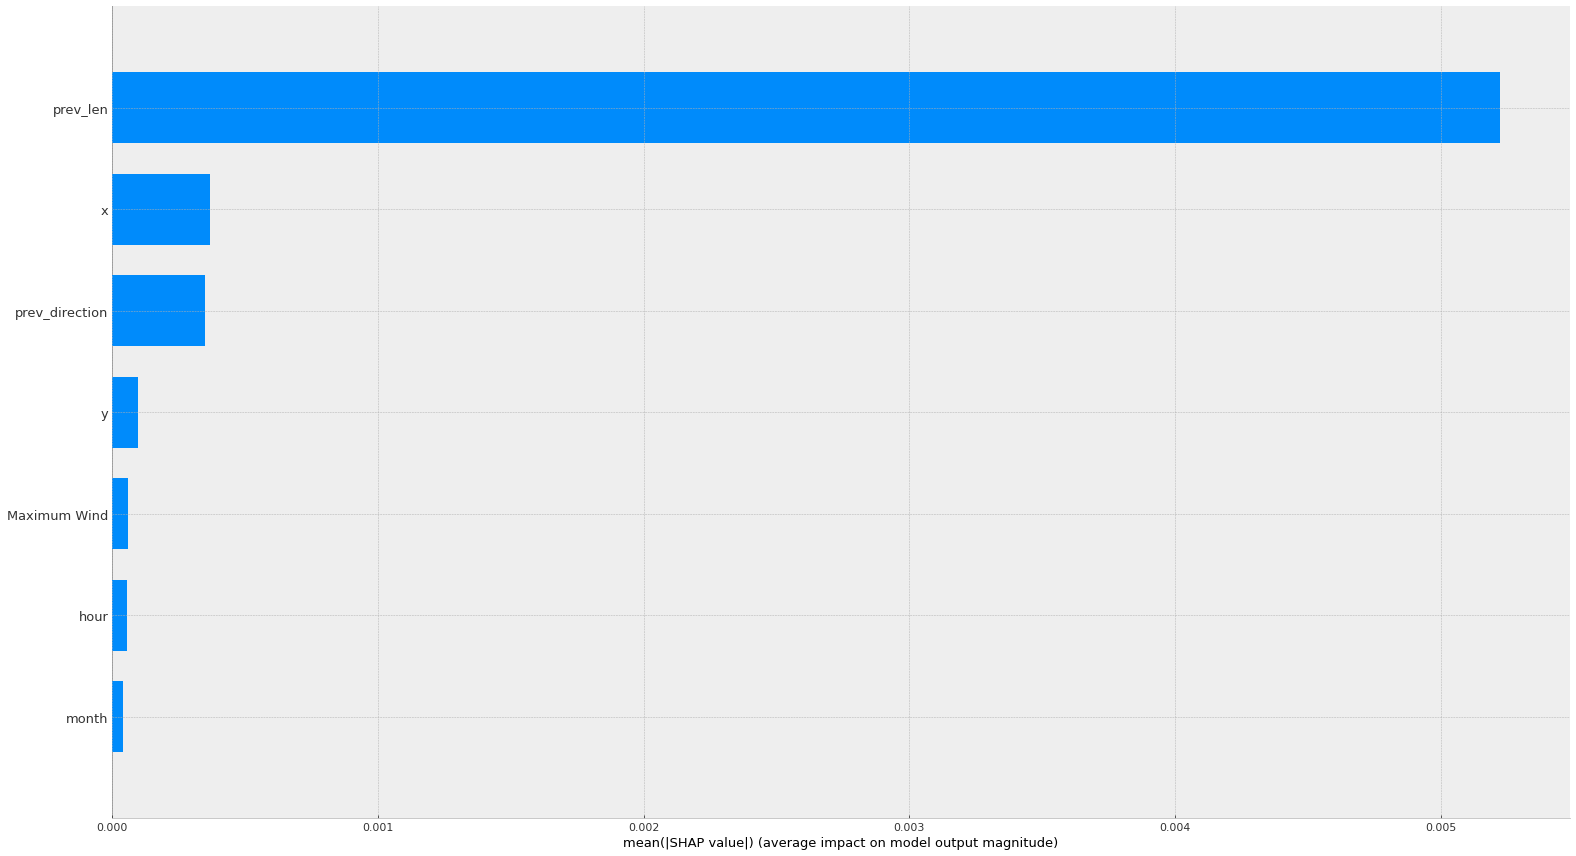

In [48]:
explainer_length = shap.TreeExplainer(model_length)
shap_values_length = explainer_length.shap_values(X_length_test)
shap.summary_plot(shap_values_length, X_length_test, plot_type = "bar", feature_names=["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"], title=" Model of Lenght and Features ", plot_size = (22,12))

The variable length has less features than the direction variable from the chart above due to changes in temperature in the water that affected the length of each storm. 

#### Analysing Visualizations: 
- In the next part of the study, storm trayectory prediction will take place to understand which storms dramatically changed trayectory based on water temperature and location. 

In [61]:
# Declaring variables to plot results

lat_min = storms_df.Latitude.min()

long_min = storms_df.Longitude.min()

temp_x = storms_df.Latitude-lat_min

temp_y = storms_df.Longitude-long_min

x_max = temp_x.max()

y_max = temp_y.max()

# Setting up funtion to calculate coordinates to latitude and longitude
def coord_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return(x*x_max)+lat_min, (y*y_max)+long_min

In [62]:
# Finding Storm by name and unique method
geo_df[geo_df.Name=="LAURIE"].ID.unique()

array(['AL261969'], dtype=object)

In [63]:
storm_id = "AL261969"

geo_df_pred = geo_df[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vect_len","vectr_direction"]][geo_df.ID==storm_id]

X_pred_direction = geo_df_pred[["Maximum Wind", "x","y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

X_pred_len = geo_df_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [64]:
storms_df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [65]:
storms_df_pred["pred_x"] = np.nan
storms_df_pred["pred_y"] = np.nan

storms_df_pred["real_x"] = geo_df_pred["x"].iloc[1:].values
storms_df_pred["real_y"] = geo_df_pred["y"].iloc[1:].values

In [67]:
last_x = geo_df_pred["x"].iloc[0]

last_y = geo_df_pred["y"].iloc[0]

coords = {"x": [], "y":[], "id":[]}

for i, row in storms_df_pred.iterrows():
    vector = np.array([0,1])
    
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    
    vector = np.matmul(vector, R)
    
    vector = vector/np.linalg.norm(vector)
    
    vector *= row.pred_len
    
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    
    last_x = row.real_x
    last_y = row.real_y
    
    storms_df_pred.loc[coords["id"], "pred_x"] = coords["x"]
    storms_df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [72]:
storms_df_pred["pred_Longitude"] = np.nan
storms_df_pred["real_Longitude"] = np.nan
storms_df_pred["pred_Latitude"] = np.nan
storms_df_pred["real_Latitude"] = np.nan

latts_longts = {"pred_Longitude":[], "real_Longitude":[], "pred_Latitude":[], "real_Latitude":[], "id":[]}
for i, row in storms_df_pred.iterrows():
    real_Latitude, real_Longitude = coord_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latts_longts["real_Latitude"].append(real_Latitude)
    latts_longts["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coord_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latts_longts["pred_Latitude"].append(pred_Latitude)
    latts_longts["pred_Longitude"].append(pred_Longitude)
    latts_longts["id"].append(i)
    
storms_df_pred.loc[latts_longts["id"], "real_Latitude"] = latts_longts["real_Latitude"]

storms_df_pred.loc[latts_longts["id"], "real_Longitude"] = latts_longts["real_Longitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Latitude"] = latts_longts["pred_Latitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Longitude"] = latts_longts["pred_Longitude"]
    

In [73]:
# Printing Predictions from 'LAURIE'storm.

storms_df_pred

,pred_len,pred_direction,pred_x,pred_y,real_x,real_y,pred_Longitude,real_Longitude,pred_Latitude,real_Latitude
0,0.004983,1.995998,0.149526,0.135915,0.147696,0.136812,-86.054586,-85.9,18.235010,18.1
1,0.003736,2.010571,0.151077,0.135221,0.150407,0.135652,-86.174334,-86.1,18.349449,18.3
2,0.003736,2.009080,0.153789,0.134067,0.155827,0.133333,-86.373464,-86.5,18.549624,18.7
3,0.006224,1.991174,0.161509,0.130793,0.161247,0.131014,-86.938188,-86.9,19.119368,19.1
4,0.006309,1.991174,0.167006,0.128440,0.169377,0.126957,-87.344133,-87.6,19.525058,19.7
5,0.009317,2.081183,0.177507,0.122405,0.178862,0.122899,-88.385166,-88.3,20.299991,20.4
6,0.010171,2.008770,0.188072,0.118585,0.186992,0.118841,-89.044056,-89.0,21.079739,21.0
7,0.009359,2.067348,0.195220,0.114382,0.193767,0.115942,-89.769075,-89.5,21.607254,21.5
8,0.007742,1.997712,0.200814,0.112736,0.205962,0.111884,-90.052988,-90.2,22.020084,22.4
9,0.012424,1.894706,0.217740,0.107930,0.218157,0.108406,-90.882110,-90.8,23.269212,23.3


In [80]:
# Setting up visualization of Storm Trajectory
geo_real = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.real_Longitude, storms_df_pred.real_Latitude), crs={'init' : 'epsg:4326'})

geo_pred = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.pred_Longitude, storms_df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

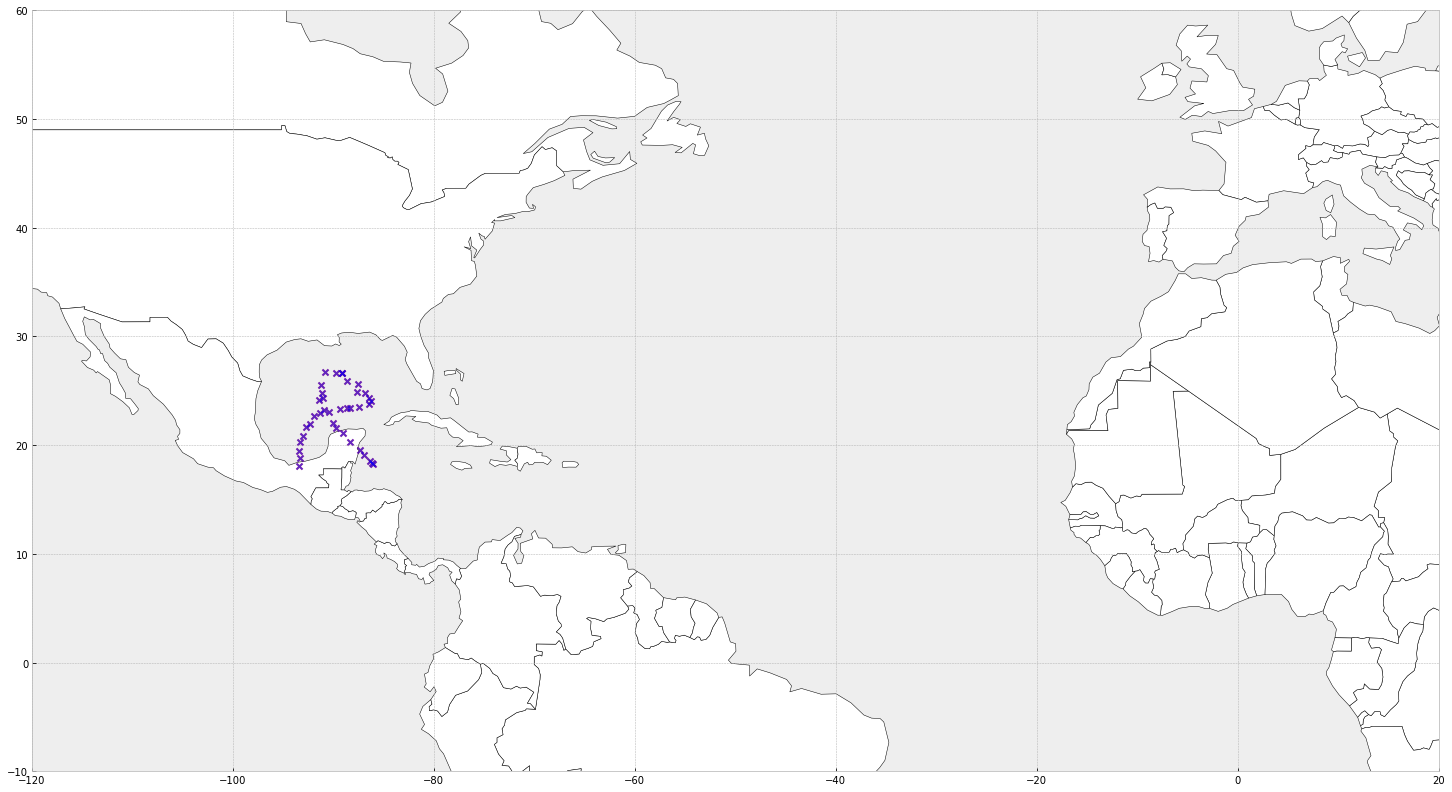

In [91]:
ax = world.plot(color="white", edgecolor="black", figsize=(26,14))
_ = geo_real.plot(ax=ax, c="r", marker="x", alpha=0.6)
_ = geo_pred.plot(ax=ax, c="b", marker="x", alpha=0.6)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)


In [100]:
# Declaring variables to plot results

lat_min = storms_df.Latitude.min()

long_min = storms_df.Longitude.min()

temp_x = storms_df.Latitude-lat_min

temp_y = storms_df.Longitude-long_min

x_max = temp_x.max()

y_max = temp_y.max()

# Setting up funtion to calculate coordinates to latitude and longitude
def coord_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return(x*x_max)+lat_min, (y*y_max)+long_min

In [101]:
# Finding Storm by name and unique method
geo_df[geo_df.Name=="JOAQUIN"].ID.unique()

array(['AL112015'], dtype=object)

In [102]:
storm_id = "AL112015"

geo_df_pred = geo_df[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vect_len","vectr_direction"]][geo_df.ID==storm_id]

X_pred_direction = geo_df_pred[["Maximum Wind", "x","y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

X_pred_len = geo_df_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [103]:
storms_df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [104]:
storms_df_pred["pred_x"] = np.nan
storms_df_pred["pred_y"] = np.nan

storms_df_pred["real_x"] = geo_df_pred["x"].iloc[1:].values
storms_df_pred["real_y"] = geo_df_pred["y"].iloc[1:].values

In [105]:
last_x = geo_df_pred["x"].iloc[0]

last_y = geo_df_pred["y"].iloc[0]

coords = {"x": [], "y":[], "id":[]}

for i, row in storms_df_pred.iterrows():
    vector = np.array([0,1])
    
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    
    vector = np.matmul(vector, R)
    
    vector = vector/np.linalg.norm(vector)
    
    vector *= row.pred_len
    
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    
    last_x = row.real_x
    last_y = row.real_y
    
    storms_df_pred.loc[coords["id"], "pred_x"] = coords["x"]
    storms_df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [106]:
storms_df_pred["pred_Longitude"] = np.nan
storms_df_pred["real_Longitude"] = np.nan
storms_df_pred["pred_Latitude"] = np.nan
storms_df_pred["real_Latitude"] = np.nan

latts_longts = {"pred_Longitude":[], "real_Longitude":[], "pred_Latitude":[], "real_Latitude":[], "id":[]}
for i, row in storms_df_pred.iterrows():
    real_Latitude, real_Longitude = coord_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latts_longts["real_Latitude"].append(real_Latitude)
    latts_longts["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coord_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latts_longts["pred_Latitude"].append(pred_Latitude)
    latts_longts["pred_Longitude"].append(pred_Longitude)
    latts_longts["id"].append(i)
    
storms_df_pred.loc[latts_longts["id"], "real_Latitude"] = latts_longts["real_Latitude"]

storms_df_pred.loc[latts_longts["id"], "real_Longitude"] = latts_longts["real_Longitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Latitude"] = latts_longts["pred_Latitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Longitude"] = latts_longts["pred_Longitude"]

In [107]:
# Printing Predictions from 'JOAQUIN'storm.

storms_df_pred

,pred_len,pred_direction,pred_x,pred_y,real_x,real_y,pred_Longitude,real_Longitude,pred_Latitude,real_Latitude
0,0.002869,1.428349,0.271133,0.238088,0.269648,0.237101,-68.429743,-68.6,27.209579,27.1
1,0.003193,2.008795,0.272540,0.235747,0.271003,0.235942,-68.833629,-68.8,27.313420,27.2
2,0.002887,2.317120,0.273122,0.233982,0.273713,0.234783,-69.138146,-69.0,27.356439,27.4
3,0.003866,1.996699,0.277233,0.233185,0.276423,0.233043,-69.275525,-69.3,27.659829,27.6
4,0.004310,2.091918,0.280160,0.230898,0.277778,0.230725,-69.670125,-69.7,27.875844,27.7
5,0.003848,2.555805,0.279905,0.227518,0.273713,0.228986,-70.253065,-70.0,27.856988,27.4
6,0.004797,3.939541,0.270279,0.225636,0.266938,0.228406,-70.577713,-70.1,27.146556,26.9
7,0.006760,4.452875,0.260404,0.226671,0.261518,0.227246,-70.399245,-70.3,26.417800,26.5
8,0.005539,4.365437,0.256308,0.225363,0.257453,0.226087,-70.624915,-70.5,26.115555,26.2
9,0.004709,4.157440,0.253450,0.223606,0.254743,0.224348,-70.928041,-70.8,25.904603,26.0


In [108]:
# Setting up visualization of Storm Trajectory
geo_real = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.real_Longitude, storms_df_pred.real_Latitude), crs={'init' : 'epsg:4326'})

geo_pred = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.pred_Longitude, storms_df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

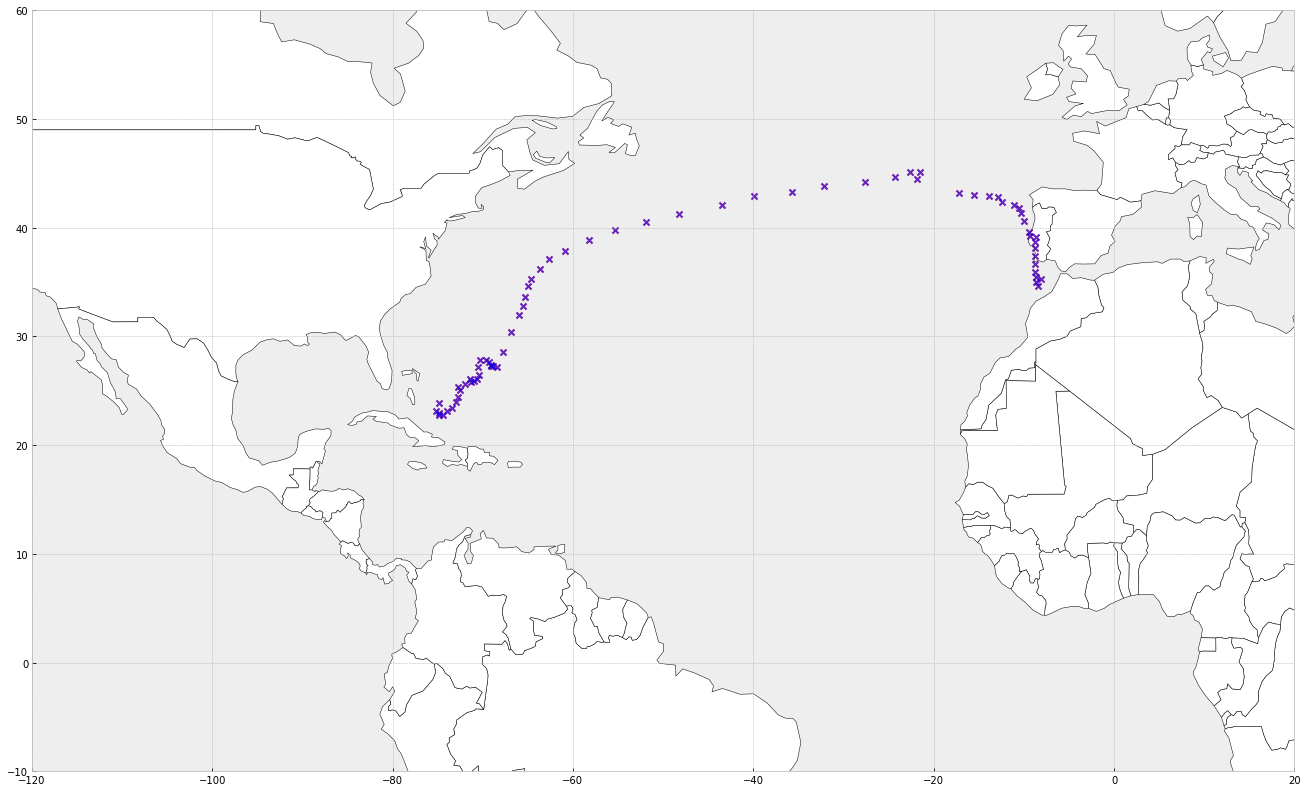

In [109]:
ax = world.plot(color="white", edgecolor="black", figsize=(26,14))
_ = geo_real.plot(ax=ax, c="r", marker="x", alpha=0.6)
_ = geo_pred.plot(ax=ax, c="b", marker="x", alpha=0.6)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)

In [112]:
# Declaring variables to plot results

lat_min = storms_df.Latitude.min()

long_min = storms_df.Longitude.min()

temp_x = storms_df.Latitude-lat_min

temp_y = storms_df.Longitude-long_min

x_max = temp_x.max()

y_max = temp_y.max()

# Setting up funtion to calculate coordinates to latitude and longitude
def coord_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return(x*x_max)+lat_min, (y*y_max)+long_min

In [113]:
# Finding Storm by name and unique method
geo_df[geo_df.Name=="IDA"].ID.unique()

array(['AL112009', 'AL102015'], dtype=object)

In [114]:
storm_id = "AL102015"

geo_df_pred = geo_df[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vect_len","vectr_direction"]][geo_df.ID==storm_id]

X_pred_direction = geo_df_pred[["Maximum Wind", "x","y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

X_pred_len = geo_df_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [115]:
storms_df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [116]:
storms_df_pred["pred_x"] = np.nan
storms_df_pred["pred_y"] = np.nan

storms_df_pred["real_x"] = geo_df_pred["x"].iloc[1:].values
storms_df_pred["real_y"] = geo_df_pred["y"].iloc[1:].values

In [117]:
last_x = geo_df_pred["x"].iloc[0]

last_y = geo_df_pred["y"].iloc[0]

coords = {"x": [], "y":[], "id":[]}

for i, row in storms_df_pred.iterrows():
    vector = np.array([0,1])
    
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    
    vector = np.matmul(vector, R)
    
    vector = vector/np.linalg.norm(vector)
    
    vector *= row.pred_len
    
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    
    last_x = row.real_x
    last_y = row.real_y
    
    storms_df_pred.loc[coords["id"], "pred_x"] = coords["x"]
    storms_df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [119]:
storms_df_pred["pred_Longitude"] = np.nan
storms_df_pred["real_Longitude"] = np.nan
storms_df_pred["pred_Latitude"] = np.nan
storms_df_pred["real_Latitude"] = np.nan

latts_longts = {"pred_Longitude":[], "real_Longitude":[], "pred_Latitude":[], "real_Latitude":[], "id":[]}
for i, row in storms_df_pred.iterrows():
    real_Latitude, real_Longitude = coord_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latts_longts["real_Latitude"].append(real_Latitude)
    latts_longts["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coord_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latts_longts["pred_Latitude"].append(pred_Latitude)
    latts_longts["pred_Longitude"].append(pred_Longitude)
    latts_longts["id"].append(i)
    
storms_df_pred.loc[latts_longts["id"], "real_Latitude"] = latts_longts["real_Latitude"]

storms_df_pred.loc[latts_longts["id"], "real_Longitude"] = latts_longts["real_Longitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Latitude"] = latts_longts["pred_Latitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Longitude"] = latts_longts["pred_Longitude"]

In [120]:
# Printing Predictions from 'JOAQUIN'storm.

storms_df_pred

,pred_len,pred_direction,pred_x,pred_y,real_x,real_y,pred_Longitude,real_Longitude,pred_Latitude,real_Latitude
0,0.008637,2.481876,0.044589,0.473755,0.043360,0.474783,-27.777258,-27.6,10.490666,10.4
1,0.007310,2.519095,0.047623,0.468843,0.047425,0.468986,-28.624517,-28.6,10.714573,10.7
2,0.007429,2.519095,0.051757,0.462950,0.051491,0.463188,-29.641089,-29.6,11.019661,11.0
3,0.007288,2.537434,0.055630,0.457191,0.055556,0.456812,-30.634587,-30.7,11.305525,11.3
4,0.007833,2.589991,0.059660,0.450140,0.059621,0.450435,-31.850785,-31.8,11.602940,11.6
5,0.007856,2.572371,0.063855,0.443818,0.065041,0.444058,-32.941448,-32.9,11.912476,12.0
6,0.008621,2.462996,0.070452,0.437347,0.069106,0.438261,-34.057715,-33.9,12.399382,12.3
7,0.007288,2.530895,0.073285,0.432290,0.073171,0.432464,-34.929895,-34.9,12.608413,12.6
8,0.007288,2.530895,0.077350,0.426493,0.077236,0.427826,-35.929895,-35.7,12.908413,12.9
9,0.006685,2.413138,0.081686,0.422838,0.081301,0.423768,-36.560469,-36.4,13.228423,13.2


In [121]:
# Setting up visualization of Storm Trajectory
geo_real = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.real_Longitude, storms_df_pred.real_Latitude), crs={'init' : 'epsg:4326'})

geo_pred = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.pred_Longitude, storms_df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

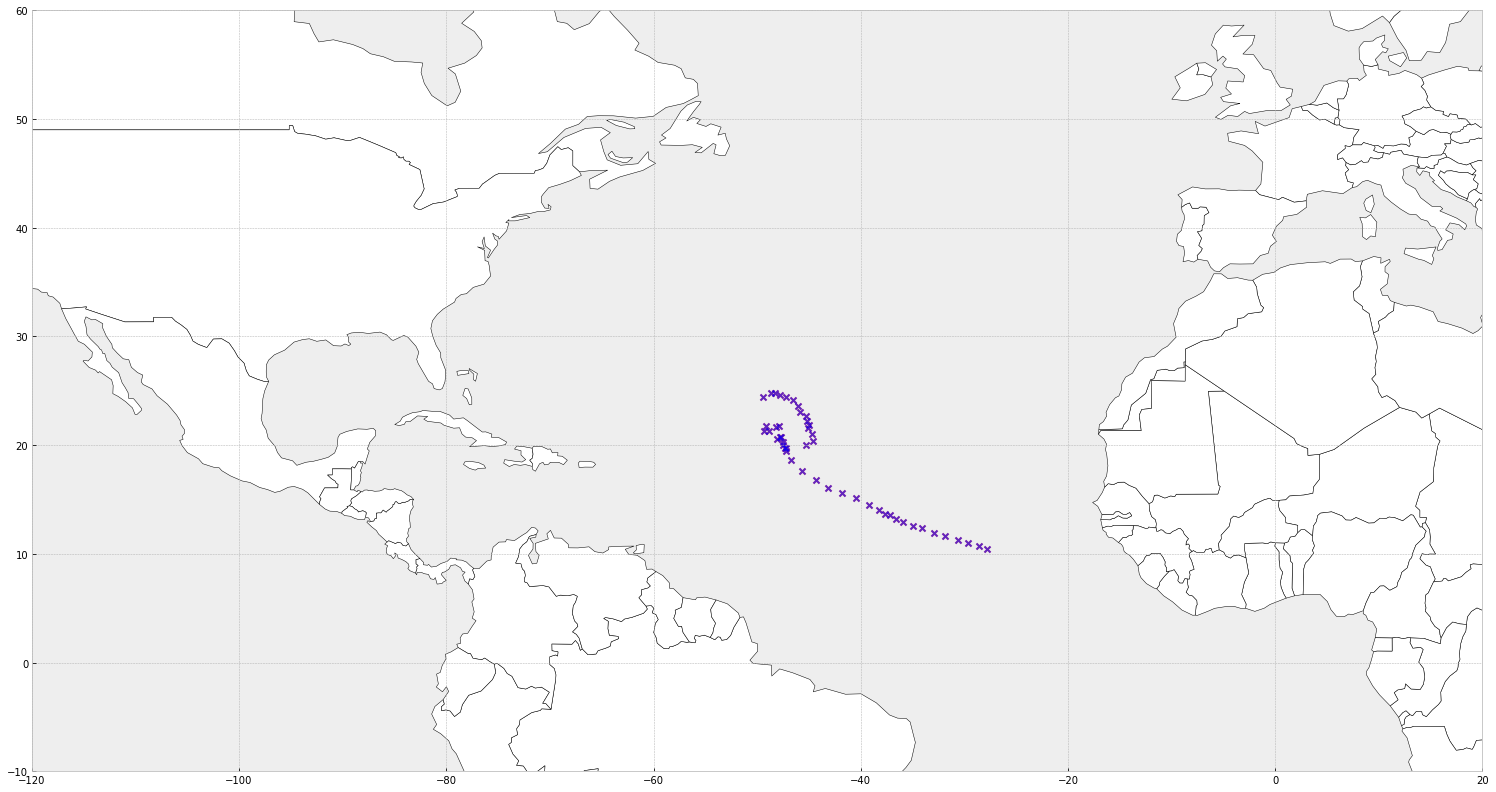

In [122]:
ax = world.plot(color="white", edgecolor="black", figsize=(26,14))
_ = geo_real.plot(ax=ax, c="r", marker="x", alpha=0.6)
_ = geo_pred.plot(ax=ax, c="b", marker="x", alpha=0.6)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)

In [123]:
# Declaring variables to plot results

lat_min = storms_df.Latitude.min()

long_min = storms_df.Longitude.min()

temp_x = storms_df.Latitude-lat_min

temp_y = storms_df.Longitude-long_min

x_max = temp_x.max()

y_max = temp_y.max()

# Setting up funtion to calculate coordinates to latitude and longitude
def coord_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return(x*x_max)+lat_min, (y*y_max)+long_min

In [124]:
# Finding Storm by name and unique method
geo_df[geo_df.Name=="GRACE"].ID.unique()

array(['AL111991', 'AL091997', 'AL112003', 'AL092009', 'AL072015'],
      dtype=object)

In [126]:
storm_id = "AL072015"

geo_df_pred = geo_df[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vect_len","vectr_direction"]][geo_df.ID==storm_id]

X_pred_direction = geo_df_pred[["Maximum Wind", "x","y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

X_pred_len = geo_df_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [127]:
storms_df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [128]:
storms_df_pred["pred_x"] = np.nan
storms_df_pred["pred_y"] = np.nan

storms_df_pred["real_x"] = geo_df_pred["x"].iloc[1:].values
storms_df_pred["real_y"] = geo_df_pred["y"].iloc[1:].values

In [129]:
last_x = geo_df_pred["x"].iloc[0]

last_y = geo_df_pred["y"].iloc[0]

coords = {"x": [], "y":[], "id":[]}

for i, row in storms_df_pred.iterrows():
    vector = np.array([0,1])
    
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    
    vector = np.matmul(vector, R)
    
    vector = vector/np.linalg.norm(vector)
    
    vector *= row.pred_len
    
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    
    last_x = row.real_x
    last_y = row.real_y
    
    storms_df_pred.loc[coords["id"], "pred_x"] = coords["x"]
    storms_df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [130]:
storms_df_pred["pred_Longitude"] = np.nan
storms_df_pred["real_Longitude"] = np.nan
storms_df_pred["pred_Latitude"] = np.nan
storms_df_pred["real_Latitude"] = np.nan

latts_longts = {"pred_Longitude":[], "real_Longitude":[], "pred_Latitude":[], "real_Latitude":[], "id":[]}
for i, row in storms_df_pred.iterrows():
    real_Latitude, real_Longitude = coord_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latts_longts["real_Latitude"].append(real_Latitude)
    latts_longts["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coord_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latts_longts["pred_Latitude"].append(pred_Latitude)
    latts_longts["pred_Longitude"].append(pred_Longitude)
    latts_longts["id"].append(i)
    
storms_df_pred.loc[latts_longts["id"], "real_Latitude"] = latts_longts["real_Latitude"]

storms_df_pred.loc[latts_longts["id"], "real_Longitude"] = latts_longts["real_Longitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Latitude"] = latts_longts["pred_Latitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Longitude"] = latts_longts["pred_Longitude"]

In [131]:
# Printing Predictions from 'JOAQUIN'storm.

storms_df_pred

,pred_len,pred_direction,pred_x,pred_y,real_x,real_y,pred_Longitude,real_Longitude,pred_Latitude,real_Latitude
0,0.007801,2.924387,0.070787,0.478179,0.070461,0.478841,-27.014058,-26.9,12.424068,12.4
1,0.007306,2.924387,0.072035,0.471706,0.071816,0.472464,-28.130740,-28.0,12.516201,12.5
2,0.006933,2.880854,0.073603,0.465765,0.074526,0.465507,-29.155513,-29.2,12.631901,12.7
3,0.007860,2.723634,0.077716,0.458324,0.077236,0.457971,-30.439130,-30.5,12.935446,12.9
4,0.008173,2.779700,0.080129,0.450327,0.081301,0.449855,-31.818548,-31.9,13.113552,13.2
5,0.009124,2.670249,0.085444,0.441726,0.085366,0.441159,-33.302299,-33.4,13.505764,13.5
6,0.009585,2.650683,0.089884,0.432707,0.088076,0.431884,-34.858129,-35.0,13.833470,13.7
7,0.009867,2.805457,0.091330,0.422569,0.089431,0.422029,-36.606804,-36.7,13.940185,13.8
8,0.009758,2.969692,0.091100,0.412415,0.090786,0.412174,-38.358437,-38.4,13.923183,13.9
9,0.009758,2.969692,0.092455,0.402560,0.092141,0.402319,-40.058437,-40.1,14.023183,14.0


In [132]:
# Setting up visualization of Storm Trajectory
geo_real = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.real_Longitude, storms_df_pred.real_Latitude), crs={'init' : 'epsg:4326'})

geo_pred = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.pred_Longitude, storms_df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

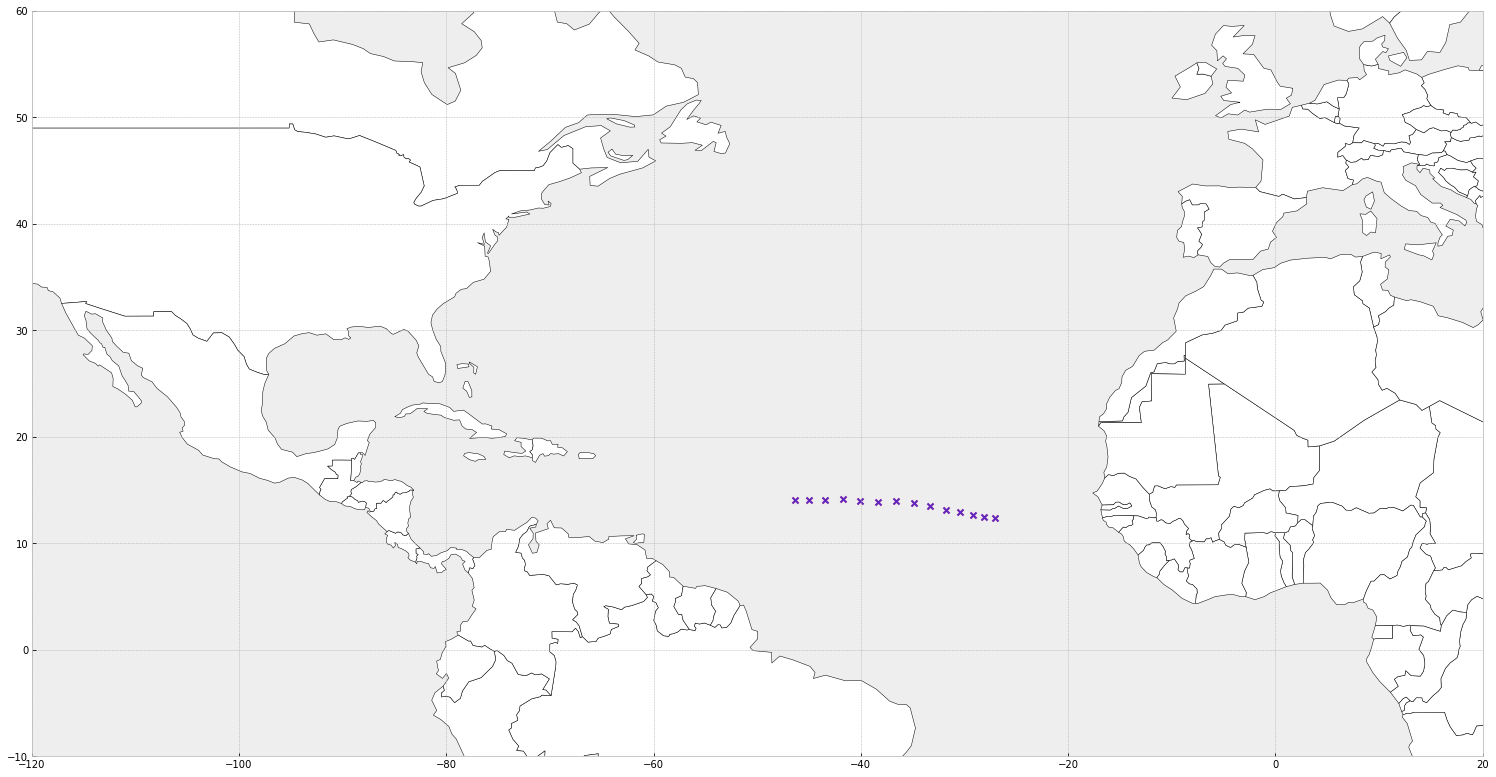

In [133]:
ax = world.plot(color="white", edgecolor="black", figsize=(26,14))
_ = geo_real.plot(ax=ax, c="r", marker="x", alpha=0.6)
_ = geo_pred.plot(ax=ax, c="b", marker="x", alpha=0.6)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)

In [134]:
# Declaring variables to plot results

lat_min = storms_df.Latitude.min()

long_min = storms_df.Longitude.min()

temp_x = storms_df.Latitude-lat_min

temp_y = storms_df.Longitude-long_min

x_max = temp_x.max()

y_max = temp_y.max()

# Setting up funtion to calculate coordinates to latitude and longitude
def coord_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return(x*x_max)+lat_min, (y*y_max)+long_min

In [135]:
# Finding Storm by name and unique method
geo_df[geo_df.Name=="GONZALO"].ID.unique()

array(['AL082014'], dtype=object)

In [136]:
storm_id = "AL082014"

geo_df_pred = geo_df[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vect_len","vectr_direction"]][geo_df.ID==storm_id]

X_pred_direction = geo_df_pred[["Maximum Wind", "x","y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

X_pred_len = geo_df_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [137]:
storms_df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [138]:
storms_df_pred["pred_x"] = np.nan
storms_df_pred["pred_y"] = np.nan

storms_df_pred["real_x"] = geo_df_pred["x"].iloc[1:].values
storms_df_pred["real_y"] = geo_df_pred["y"].iloc[1:].values

In [139]:
last_x = geo_df_pred["x"].iloc[0]

last_y = geo_df_pred["y"].iloc[0]

coords = {"x": [], "y":[], "id":[]}

for i, row in storms_df_pred.iterrows():
    vector = np.array([0,1])
    
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    
    vector = np.matmul(vector, R)
    
    vector = vector/np.linalg.norm(vector)
    
    vector *= row.pred_len
    
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    
    last_x = row.real_x
    last_y = row.real_y
    
    storms_df_pred.loc[coords["id"], "pred_x"] = coords["x"]
    storms_df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [140]:
storms_df_pred["pred_Longitude"] = np.nan
storms_df_pred["real_Longitude"] = np.nan
storms_df_pred["pred_Latitude"] = np.nan
storms_df_pred["real_Latitude"] = np.nan

latts_longts = {"pred_Longitude":[], "real_Longitude":[], "pred_Latitude":[], "real_Latitude":[], "id":[]}
for i, row in storms_df_pred.iterrows():
    real_Latitude, real_Longitude = coord_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latts_longts["real_Latitude"].append(real_Latitude)
    latts_longts["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coord_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latts_longts["pred_Latitude"].append(pred_Latitude)
    latts_longts["pred_Longitude"].append(pred_Longitude)
    latts_longts["id"].append(i)
    
storms_df_pred.loc[latts_longts["id"], "real_Latitude"] = latts_longts["real_Latitude"]

storms_df_pred.loc[latts_longts["id"], "real_Longitude"] = latts_longts["real_Longitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Latitude"] = latts_longts["pred_Latitude"]

storms_df_pred.loc[latts_longts["id"], "pred_Longitude"] = latts_longts["pred_Longitude"]

In [141]:
# Printing Predictions from 'JOAQUIN'storm.

storms_df_pred

,pred_len,pred_direction,pred_x,pred_y,real_x,real_y,pred_Longitude,real_Longitude,pred_Latitude,real_Latitude
0,0.006030,3.058529,0.125162,0.298918,0.124661,0.299130,-57.936655,-57.9,16.436924,16.4
1,0.006204,3.047686,0.125243,0.292954,0.124661,0.293913,-58.965461,-58.8,16.442932,16.4
2,0.005431,3.065824,0.125072,0.288498,0.126016,0.288696,-59.734083,-59.7,16.430337,16.5
3,0.005836,2.838768,0.127757,0.283125,0.128726,0.283478,-60.660970,-60.6,16.628450,16.7
4,0.006284,2.655210,0.131664,0.277923,0.132791,0.278261,-61.558276,-61.5,16.916775,17.0
5,0.006998,2.471541,0.137137,0.272776,0.161247,0.263768,-62.446117,-64.0,17.320718,19.1
6,0.011634,1.963834,0.171994,0.259312,0.172087,0.259130,-64.768637,-64.8,19.893138,19.9
7,0.011865,1.963834,0.183047,0.254586,0.184282,0.255072,-65.583855,-65.5,20.708841,20.8
8,0.012819,1.863455,0.196555,0.251374,0.196477,0.251014,-66.137932,-66.2,21.705790,21.7
9,0.012982,1.858919,0.208924,0.247326,0.207317,0.246377,-66.836331,-67.0,22.618579,22.5


In [142]:
# Setting up visualization of Storm Trajectory
geo_real = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.real_Longitude, storms_df_pred.real_Latitude), crs={'init' : 'epsg:4326'})

geo_pred = gpd.GeoDataFrame(storms_df_pred, geometry = gpd.points_from_xy(storms_df_pred.pred_Longitude, storms_df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

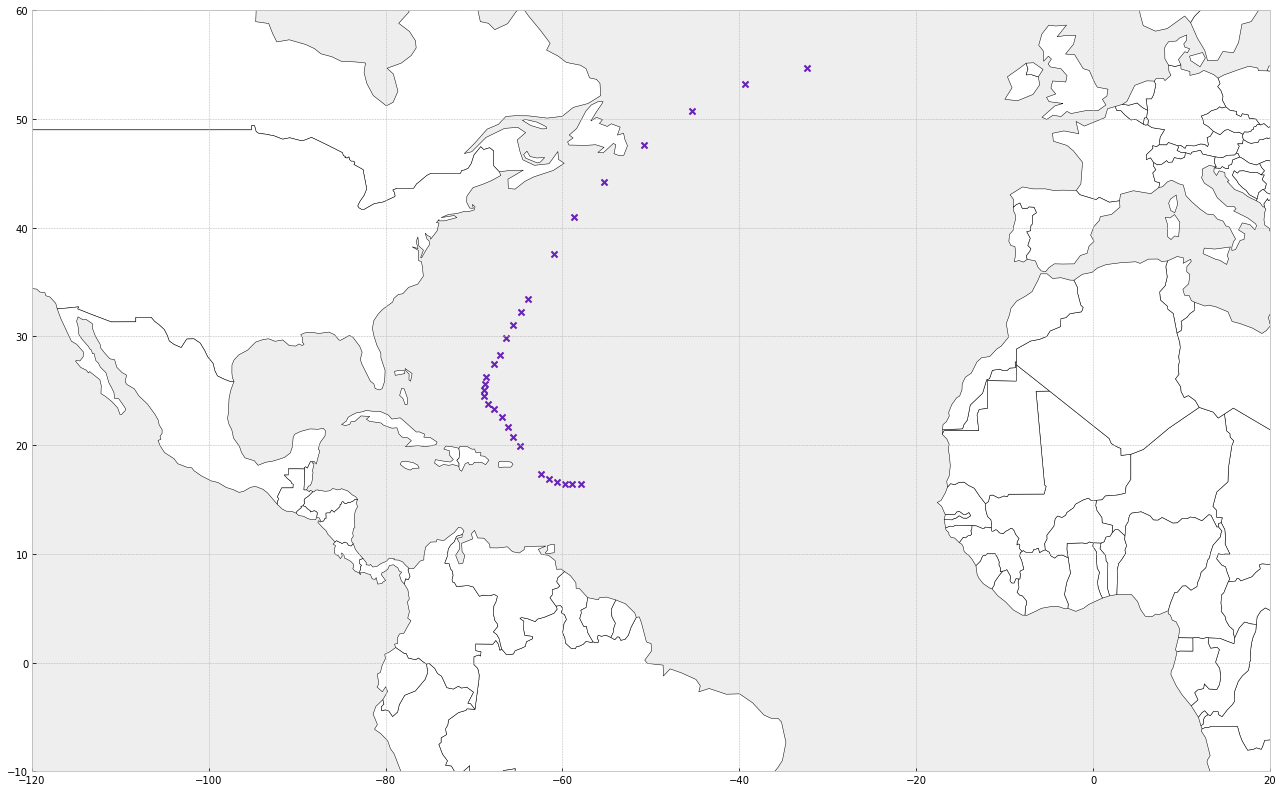

In [143]:
ax = world.plot(color="white", edgecolor="black", figsize=(26,14))
_ = geo_real.plot(ax=ax, c="r", marker="x", alpha=0.6)
_ = geo_pred.plot(ax=ax, c="b", marker="x", alpha=0.6)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)

##### Results:

- Each visualization provides enough data to understand each storm's pattern. According to the dataset the storms from 2015 had more chances to develop in the Caribbean Sea because of its warm waters and warm air masses developed from the Gulf of Mexico. 
- The last and only 2014 Storm analyzed, "GONZALO" provides enough data to understand that its development was due to warm air masses originated from the West Coast of Africa and warm waters in the Caribbean Sea, due to the lack of warm air masses from from the Gulf of Mexico its pattern stayed off the coast of Puerto Rico heading north-east without affecting the eastern coast of the United States and Canada.  